In [1]:
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)


n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

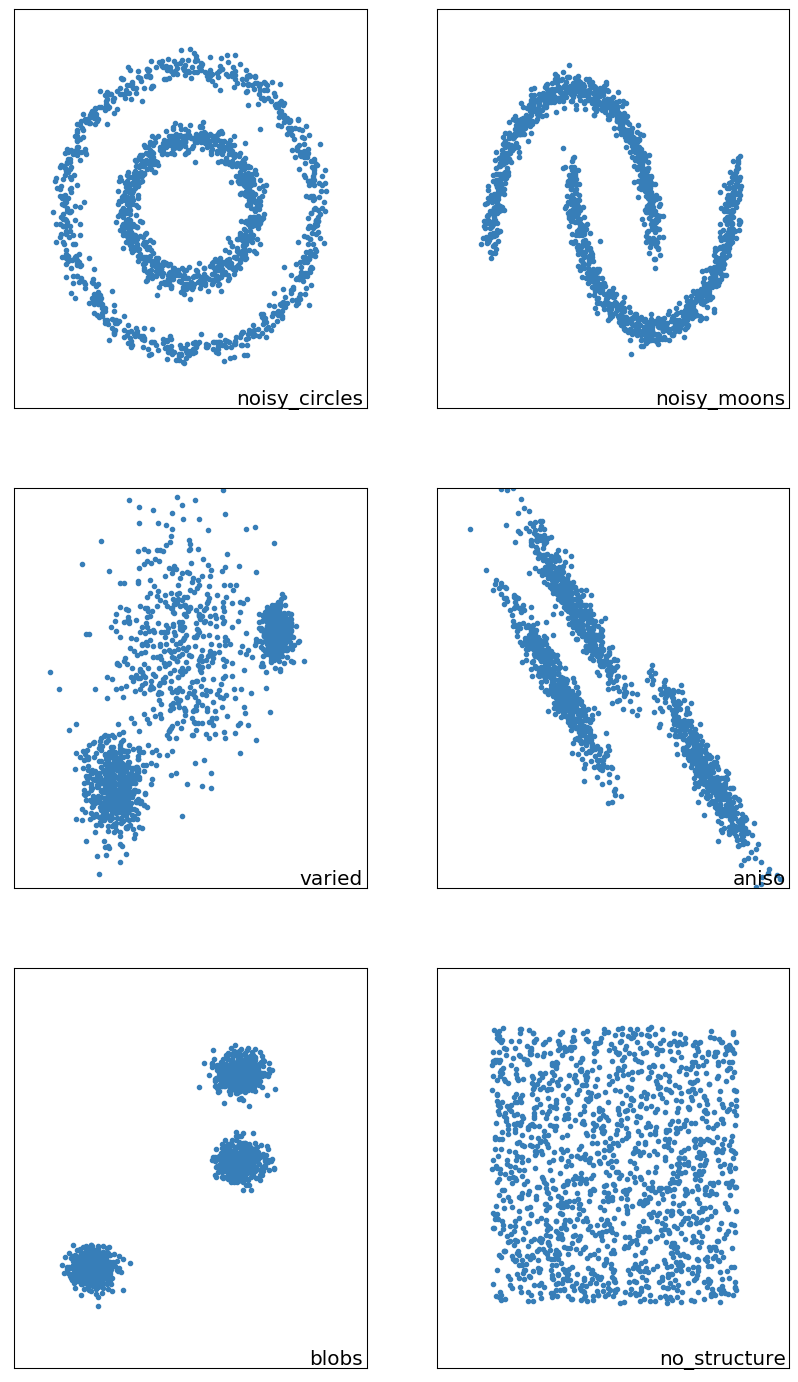

In [2]:
def plot_dots(datasets, mycolor = '#377eb8', my_dpi=96):
    fsize = (1000/my_dpi, len(datasets)*300/my_dpi)
    fig = plt.figure(figsize = fsize, dpi = my_dpi)
    
    plot_num = 1
    for data, name in datasets:
        # update parameters with dataset-specific values
        X, y = data

        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        plt.subplot(len(datasets)/2, 2, plot_num)
        plt.scatter(X[:, 0], X[:, 1], s = 10, color = mycolor)

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, name, transform = plt.gca().transAxes, size=15,
                     horizontalalignment='right')
        plot_num = plot_num + 1 
        
    plt.show()
    
    

datasets = [(noisy_circles, "noisy_circles"), 
        (noisy_moons, "noisy_moons"), 
        (varied, "varied"),
        (aniso, "aniso"),
        (blobs, "blobs"), 
        (no_structure, "no_structure")]


plot_dots(datasets)

In [3]:
# Export the datasets to .csv files
for dataset, name in datasets:
    data, target = dataset
    df = pd.DataFrame(data, columns=['X', 'Y'])
    df['target'] = pd.Series(target)
    df.to_csv("../../data/{}.csv".format(name), index=False, encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/noisy_circles.csv'